In [89]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [90]:
url_base = "https://limitlesstcg.com/tournaments/jp?show=50"

In [91]:
response = requests.get(url_base)
soup = BeautifulSoup(response.content, "html.parser")

In [92]:
table_rows = soup.select("tr")

table_rows

[<tr>
 <th class="sort" data-sort="date">Date</th>
 <th class="sort" data-sort="city">Prefecture</th>
 <th class="sort landscape-only" data-sort="shop">Shop</th>
 <th class="sort" data-sort="winner">Winner</th>
 </tr>,
 <tr data-city="Tōkyō" data-date="2024-09-09" data-shop="秋葉原チェルモ" data-winner="raging-bolt ogerpon">
 <td><a href="https://limitlesstcg.com/tournaments/jp/833">09 Sep 24</a></td>
 <td><a href="https://limitlesstcg.com/tournaments/jp/833">Tōkyō</a></td>
 <td class="landscape-only"><a href="https://limitlesstcg.com/tournaments/jp/833">秋葉原チェルモ</a></td>
 <td> <a href="https://limitlesstcg.com/decks/list/jp/12281"><span><img alt="raging-bolt" class="pokemon" src="https://limitlesstcg.s3.us-east-2.amazonaws.com/pokemon/gen9/raging-bolt.png"/><img alt="ogerpon" class="pokemon" src="https://limitlesstcg.s3.us-east-2.amazonaws.com/pokemon/gen9/ogerpon.png"/></span></a> </td>
 </tr>,
 <tr data-city="Kyōto" data-date="2024-09-09" data-shop="GIRAFULL京都店" data-winner="lugia cinccino"

In [93]:
for row in range(1, len(table_rows)):
    tournament_url = table_rows[row].select("a")[0].get('href')

In [94]:
table_rows[1].select("a")[0].get('href')

'https://limitlesstcg.com/tournaments/jp/833'

In [115]:
table_rows[1].get('data-date')

'2024-09-09'

In [114]:
table_rows[1].get('data-date') > '2024-09-11'

False

In [96]:
table_rows[2].select("a")[0].get('href')

'https://limitlesstcg.com/tournaments/jp/832'

In [97]:
tournament_url = table_rows[1].select("a")[0].get('href')

In [98]:
tournament_code = tournament_url.split('/')[-1]

In [99]:
response = requests.get(tournament_url)
soup_aux = BeautifulSoup(response.content, "html.parser")

In [100]:
table_rows = soup_aux.select("tr")

table_rows

[<tr>
 <th>#</th>
 <th>Player</th>
 <th>Deck</th>
 <th>List</th>
 </tr>,
 <tr>
 <td>1</td>
 <td><a href="/players/jp/0077005010">シノ</a></td>
 <td> <a href="https://limitlesstcg.com/decks/list/jp/12281"><span><img alt="raging-bolt" class="pokemon" src="https://limitlesstcg.s3.us-east-2.amazonaws.com/pokemon/gen9/raging-bolt.png"/><img alt="ogerpon" class="pokemon" src="https://limitlesstcg.s3.us-east-2.amazonaws.com/pokemon/gen9/ogerpon.png"/></span></a> </td>
 <td> <a href="https://limitlesstcg.com/decks/list/jp/12281"><i class="far fa-lg fa-list-alt"></i></a> </td>
 </tr>,
 <tr>
 <td>2</td>
 <td><a href="/players/jp/0052427482">ぐーちゃん</a></td>
 <td> <a href="https://limitlesstcg.com/decks/list/jp/12282"><span><img alt="snorlax" class="pokemon" src="https://limitlesstcg.s3.us-east-2.amazonaws.com/pokemon/gen9/snorlax.png"/><img alt="rotom" class="pokemon" src="https://limitlesstcg.s3.us-east-2.amazonaws.com/pokemon/gen9/rotom.png"/></span></a> </td>
 <td> <a href="https://limitlesstcg.c

In [101]:
deck = []
deck.append(table_rows[1].select('a')[1].select('img')[0].get('alt') + ' ' + table_rows[1].select('a')[1].select('img')[1].get('alt'))

In [102]:
deck

['raging-bolt ogerpon']

In [103]:
table_rows[1].select('a')

[<a href="/players/jp/0077005010">シノ</a>,
 <a href="https://limitlesstcg.com/decks/list/jp/12281"><span><img alt="raging-bolt" class="pokemon" src="https://limitlesstcg.s3.us-east-2.amazonaws.com/pokemon/gen9/raging-bolt.png"/><img alt="ogerpon" class="pokemon" src="https://limitlesstcg.s3.us-east-2.amazonaws.com/pokemon/gen9/ogerpon.png"/></span></a>,
 <a href="https://limitlesstcg.com/decks/list/jp/12281"><i class="far fa-lg fa-list-alt"></i></a>]

In [104]:
decks = []

for row in range(1, len(table_rows)):
    pokemon1 = ''
    pokemon2 = ''
    try:
        pokemon1 = table_rows[row].select('a')[1].select('img')[0].get('alt')
    except:
        pokemon1 = ''
    try:
        pokemon2 = table_rows[row].select('a')[1].select('img')[1].get('alt')
    except:
        pokemon2 = ''
    
    deck = pokemon1 + ' ' + pokemon2
    decks.append(deck)

In [105]:
decks

['raging-bolt ogerpon',
 'snorlax rotom',
 'greninja charizard',
 'dragapult dusknoir',
 'charizard pidgeot',
 'raging-bolt ogerpon',
 'gardevoir munkidori',
 'lugia cinccino',
 'roaring-moon flutter-mane',
 'arceus giratina-origin',
 'lugia archeops',
 'gardevoir munkidori',
 'roaring-moon ',
 'charizard pidgeot',
 'roaring-moon pecharunt',
 'dragapult comfey']

In [106]:
len(decks)
range_list = list(range(1, len(decks) + 1))

In [107]:
range_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [108]:
df_tournament = pd.DataFrame(columns=['position', 'deck'])
df_tournament['position'] = range_list
df_tournament['deck'] = decks

In [75]:
df_tournament.to_csv('./torneios/tournament_{id}.csv'.format(id=tournament_code))

In [109]:
df_tournament

,position,deck
0,1,raging-bolt ogerpon
1,2,snorlax rotom
2,3,greninja charizard
3,4,dragapult dusknoir
4,5,charizard pidgeot
5,6,raging-bolt ogerpon
6,7,gardevoir munkidori
7,8,lugia cinccino
8,9,roaring-moon flutter-mane
9,10,arceus giratina-origin


# ---------------------------------------------------------------------------------------------------------------------

In [118]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

DATE_REFERENCE = '2024-09-01'

url_base = "https://limitlesstcg.com/tournaments/jp?show=50"

response = requests.get(url_base)
soup = BeautifulSoup(response.content, "html.parser")

table_rows = soup.select("tr")

for row in range(1, len(table_rows)):

    tournament_date = table_rows[row].get('data-date')

    if tournament_date >= DATE_REFERENCE:

        tournament_url = table_rows[row].select("a")[0].get('href')

        tournament_code = tournament_url.split('/')[-1]

        response_aux = requests.get(tournament_url)
        soup_aux = BeautifulSoup(response_aux.content, "html.parser")

        tournament_rows = soup_aux.select("tr")

        decks = []

        for row in range(1, len(tournament_rows)):
            pokemon1 = ''
            pokemon2 = ''
            try:
                pokemon1 = tournament_rows[row].select('a')[1].select('img')[0].get('alt')
            except:
                pokemon1 = ''
            try:
                pokemon2 = tournament_rows[row].select('a')[1].select('img')[1].get('alt')
            except:
                pokemon2 = ''
            
            deck = pokemon1 + ' ' + pokemon2
            decks.append(deck)

        range_list = list(range(1, len(decks) + 1))

        df_tournament = pd.DataFrame(columns=['position', 'deck'])
        df_tournament['position'] = range_list
        df_tournament['deck'] = decks

        df_tournament.to_csv('./torneios/tournament_{id}.csv'.format(id=tournament_code))

# ---------------------------------------------------------------------------------------------------------------------

In [124]:
import pandas as pd
import glob

In [125]:
glued_data = pd.DataFrame()
for file_name in glob.glob('./torneios/' + '*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data,x],axis=0)

In [127]:
glued_data.drop(columns=['Unnamed: 0'], inplace=True)

In [131]:
glued_data[glued_data['position'] <= 8]

,position,deck
0,1,charizard pidgeot
1,2,ogerpon raging-bolt
2,3,ceruledge
3,4,dragapult pidgeot
4,5,palkia-origin dusknoir
...,...,...
3,4,dragapult dusknoir
4,5,charizard pidgeot
5,6,raging-bolt ogerpon
6,7,gardevoir munkidori


In [142]:
pd.set_option('display.max_rows', None)

In [147]:
glued_data['deck'].replace('ogerpon raging-bolt', 'raging-bolt ogerpon', inplace=True)
glued_data['deck'].replace('lugia cinccino', 'lugia archeops', inplace=True)
glued_data['deck'].replace('ogerpon-cornerstone snorlax', 'snorlax ogerpon-cornerstone', inplace=True)
glued_data['deck'].replace('roaring-moon squawkabilly', 'roaring-moon', inplace=True)
glued_data['deck'].replace('ceruledge ', 'ceruledge squawkabilly', inplace=True)

In [154]:
glued_data.groupby('deck').size().sort_values(ascending=False)

deck
raging-bolt ogerpon               123
charizard pidgeot                  96
dragapult pidgeot                  65
gardevoir munkidori                52
lugia archeops                     45
regidrago ogerpon                  33
ceruledge squawkabilly             20
roaring-moon pecharunt             18
dragapult xatu                     14
roaring-moon flutter-mane          14
roaring-moon                       13
iron-thorns                        12
palkia-origin dusknoir             12
snorlax ogerpon-cornerstone        11
palkia-origin noctowl              10
miraidon iron-hands                10
snorlax rotom                       8
comfey sableye                      7
baxcalibur bibarel                  7
giratina-origin comfey              6
dragapult comfey                    5
dialga-origin metang                5
gholdengo palkia-origin             5
miraidon raikou                     4
roaring-moon                        4
greninja pidgeot                    4
arceus 

In [158]:
glued_data.groupby('deck').size().sort_values(ascending=False)

deck
raging-bolt ogerpon               123
charizard pidgeot                  96
dragapult pidgeot                  65
gardevoir munkidori                52
lugia archeops                     45
regidrago ogerpon                  33
ceruledge squawkabilly             20
roaring-moon pecharunt             18
dragapult xatu                     14
roaring-moon flutter-mane          14
roaring-moon                       13
iron-thorns                        12
palkia-origin dusknoir             12
snorlax ogerpon-cornerstone        11
palkia-origin noctowl              10
miraidon iron-hands                10
snorlax rotom                       8
comfey sableye                      7
baxcalibur bibarel                  7
giratina-origin comfey              6
dragapult comfey                    5
dialga-origin metang                5
gholdengo palkia-origin             5
miraidon raikou                     4
roaring-moon                        4
greninja pidgeot                    4
arceus 

In [159]:
metaShare = pd.DataFrame({'deck': glued_data.groupby('deck').size().sort_values(ascending=False).index, 'appearances': glued_data.groupby('deck').size().sort_values(ascending=False).values})

In [160]:
metaShare

,deck,appearances
0,raging-bolt ogerpon,123
1,charizard pidgeot,96
2,dragapult pidgeot,65
3,gardevoir munkidori,52
4,lugia archeops,45
5,regidrago ogerpon,33
6,ceruledge squawkabilly,20
7,roaring-moon pecharunt,18
8,dragapult xatu,14
9,roaring-moon flutter-mane,14


In [149]:
glued_data[glued_data['position'] <= 8].groupby('deck').size().sort_values(ascending=False)

deck
raging-bolt ogerpon               57
charizard pidgeot                 50
dragapult pidgeot                 32
gardevoir munkidori               29
lugia archeops                    25
ceruledge squawkabilly            14
regidrago ogerpon                 11
snorlax ogerpon-cornerstone       10
dragapult xatu                     8
roaring-moon pecharunt             7
miraidon iron-hands                7
palkia-origin dusknoir             7
iron-thorns                        6
roaring-moon                       6
comfey sableye                     5
dragapult comfey                   4
palkia-origin noctowl              4
roaring-moon flutter-mane          4
dialga-origin metang               3
arceus dusknoir                    3
baxcalibur bibarel                 3
snorlax rotom                      3
giratina-origin comfey             3
miraidon raikou                    2
                                   2
gholdengo palkia-origin            2
dragapult dusknoir               

In [161]:
top8 = pd.DataFrame({'deck': glued_data[glued_data['position'] <= 8].groupby('deck').size().sort_values(ascending=False).index, 
                     'appearances': glued_data[glued_data['position'] <= 8].groupby('deck').size().sort_values(ascending=False).values})

In [162]:
top8

,deck,appearances
0,raging-bolt ogerpon,57
1,charizard pidgeot,50
2,dragapult pidgeot,32
3,gardevoir munkidori,29
4,lugia archeops,25
5,ceruledge squawkabilly,14
6,regidrago ogerpon,11
7,snorlax ogerpon-cornerstone,10
8,dragapult xatu,8
9,roaring-moon pecharunt,7


In [163]:
metaShare['appearances'].sum()

672

In [164]:
metaShare['share'] = (metaShare['appearances'] / metaShare['appearances'].sum()) * 100

In [184]:
metaShare.head(20)

,deck,appearances,share
0,raging-bolt ogerpon,123,18.303571
1,charizard pidgeot,96,14.285714
2,dragapult pidgeot,65,9.672619
3,gardevoir munkidori,52,7.738095
4,lugia archeops,45,6.696429
5,regidrago ogerpon,33,4.910714
6,ceruledge squawkabilly,20,2.976190
7,roaring-moon pecharunt,18,2.678571
8,dragapult xatu,14,2.083333
9,roaring-moon flutter-mane,14,2.083333


In [179]:
metaShare_plot = metaShare.set_index('deck')

<AxesSubplot: title={'center': 'Appearances for city leagues'}, xlabel='deck'>

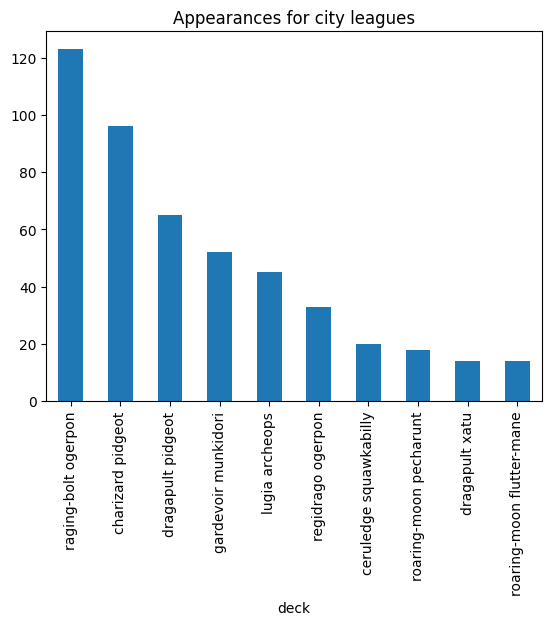

In [182]:
metaShare_plot['appearances'].head(10).plot(kind='bar', title='Appearances for city leagues')

<AxesSubplot: title={'center': 'Meta share % for city leagues'}, xlabel='deck'>

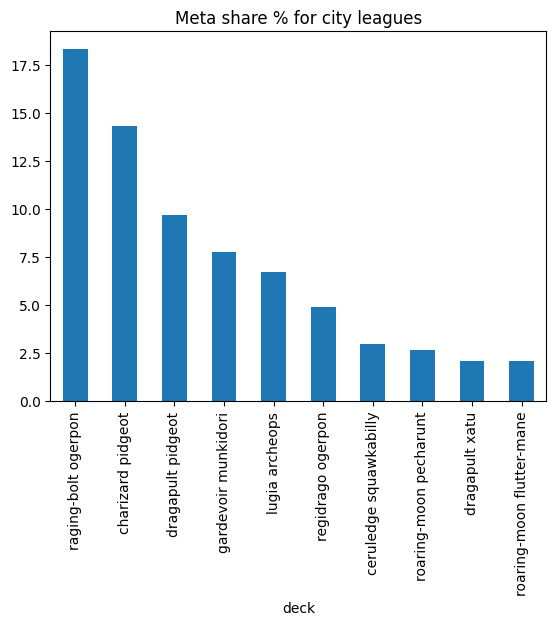

In [180]:
metaShare_plot['share'].head(10).plot(kind='bar', title='Meta share % for city leagues')

In [185]:
top8

,deck,appearances
0,raging-bolt ogerpon,57
1,charizard pidgeot,50
2,dragapult pidgeot,32
3,gardevoir munkidori,29
4,lugia archeops,25
5,ceruledge squawkabilly,14
6,regidrago ogerpon,11
7,snorlax ogerpon-cornerstone,10
8,dragapult xatu,8
9,roaring-moon pecharunt,7


In [186]:
top8['share'] = (top8['appearances'] / top8['appearances'].sum()) * 100

In [193]:
top8.head(10)

,deck,appearances,share
0,raging-bolt ogerpon,57,16.964286
1,charizard pidgeot,50,14.880952
2,dragapult pidgeot,32,9.523810
3,gardevoir munkidori,29,8.630952
4,lugia archeops,25,7.440476
5,ceruledge squawkabilly,14,4.166667
6,regidrago ogerpon,11,3.273810
7,snorlax ogerpon-cornerstone,10,2.976190
8,dragapult xatu,8,2.380952
9,roaring-moon pecharunt,7,2.083333


In [189]:
top8_plot = top8.set_index('deck')

<AxesSubplot: title={'center': 'Top 8 appearances for city leagues'}, xlabel='deck'>

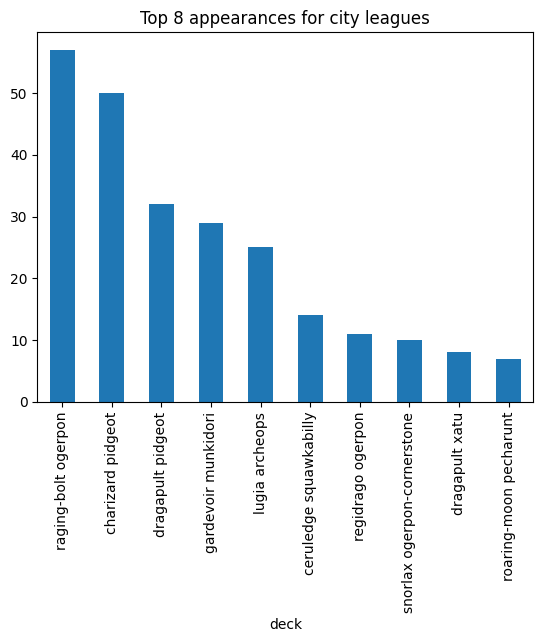

In [191]:
top8_plot['appearances'].head(10).plot(kind='bar', title='Top 8 appearances for city leagues')

<AxesSubplot: title={'center': 'Top 8 meta share % for city leagues'}, xlabel='deck'>

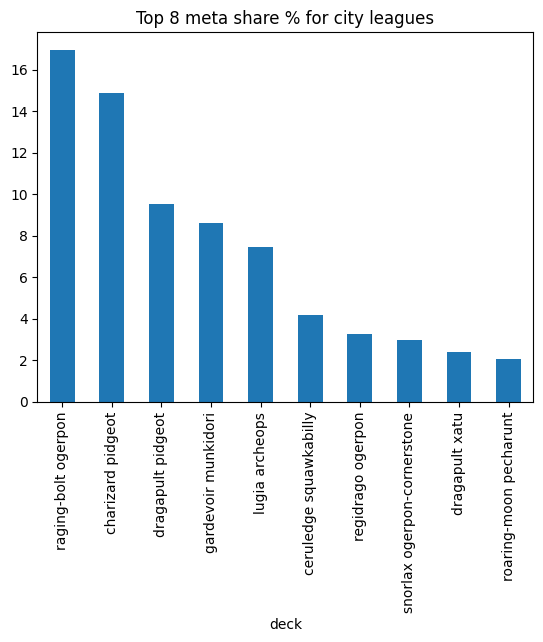

In [192]:
top8_plot['share'].head(10).plot(kind='bar', title='Top 8 meta share % for city leagues')